<a href="https://www.kaggle.com/code/dhruvkothari19/shark-tank-india?scriptVersionId=100149157" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***SHARK TANK ANALYSIS***


![sharktank](https://images.hindustantimes.com/img/2022/02/10/1600x900/Shark-Tank-India-judges-earnings-per-episode_1644490488481_1644490509511.jpg)

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import plotly.express as px
import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#### Reading Csv

In [2]:
df=pd.read_csv("/kaggle/input/shark-tank-india/Shark Tank India.csv")
df.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Word Cloud for Shark Tank India Episodes in shape of a Shark

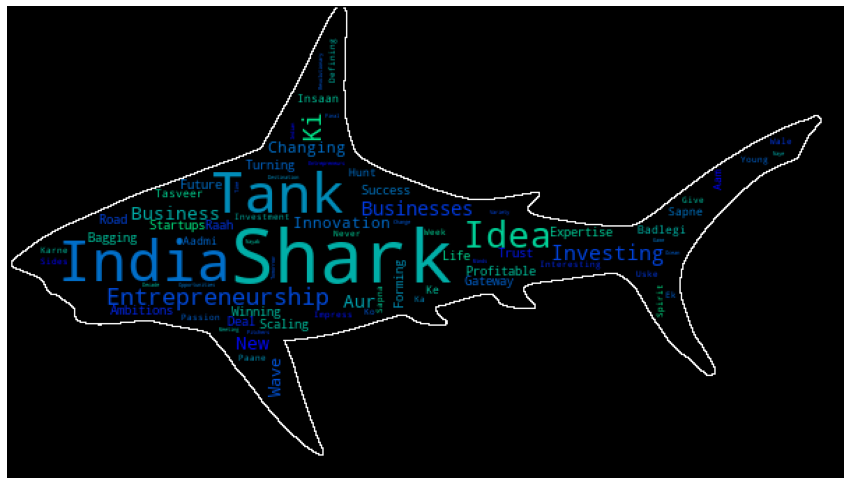

In [3]:
text = " Shark Tank India ".join(i for i in df['Episode Title'])
stopwords = STOPWORDS
mask = np.array(Image.open(r'../input/imagess/shark.png'))
wordcloud = WordCloud(width=1000, height=1500, stopwords=stopwords, mask=mask,background_color='black', contour_color='white',
                      contour_width=1,colormap='winter', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### No of pitches in each episode

In [4]:
print(df['Episode Number'].value_counts().sort_values(ascending=False).unique())

[4 3]


#### There were around 3-4 pitches in every episode.
#### Converting column name datatypes 

In [5]:

df['Male Presenters'] = df['Male Presenters'].astype(pd.Int64Dtype())
df['Female Presenters'] = df['Female Presenters'].astype(pd.Int64Dtype())
df['Started in'] = df['Started in'].astype(pd.Int64Dtype())
df['Yearly Revenue'] = df['Yearly Revenue'].astype(pd.Int64Dtype())
df['Monthly Sales'] = df['Monthly Sales'].astype(pd.Int64Dtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            112 non-null    object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    Int64  
 10  Female Presenters          62 non-null     Int64  
 11  Couple Presenters          120 non-null    float64
 12  Pitchers Average Age       121 non-null    object 
 13  Started in                 95 non-null     Int64  

In [6]:
df.describe().style.background_gradient(cmap = 'copper')  

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
count,121.000000,121.000000,121.000000,121.000000,102.000000,62.000000,120.000000,95.000000,52.000000,65.000000,35.000000,121.000000,121.000000,121.000000,121.000000,88.000000,67.000000,67.000000,9.000000,67.000000,54.000000,54.000000,2.000000,62.000000,62.000000,1.000000,67.000000,67.000000,1.000000,34.000000,34.000000,1.000000,56.000000,56.000000,1.000000,53.000000,53.000000,5.000000,13.000000,13.000000,0.000000,67.000000
mean,1.000000,19.305785,61.000000,2.082645,1.735294,1.209677,0.208333,2018.052632,405.134615,1455049.230769,53.742857,312.586786,4.860165,4414.520661,0.727273,0.761364,58.253747,15.891940,39.000000,850.402985,9.987593,1.726667,57.000000,10.973069,2.270581,25.000000,7.967616,2.482776,15.000000,9.862353,3.986176,30.000000,15.973036,2.932964,50.000000,14.899061,5.996981,23.400000,9.999250,3.592308,nan,2.223881
std,0.000000,10.375326,35.073732,0.927243,0.974186,0.483739,0.407819,2.481285,1055.349288,3167937.111913,28.929268,2721.622716,3.687683,12391.057366,0.447214,0.428693,30.473178,13.799721,25.114737,1086.042050,16.339719,3.802208,59.396970,18.539094,4.710888,nan,13.386495,4.788891,nan,12.283013,5.977489,nan,22.947765,5.810317,nan,21.192558,13.631118,2.302173,12.378205,5.322352,nan,1.165422
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2005.000000,0.000000,0.000000,3.000000,0.000050,0.250000,0.000000,0.000000,0.000000,0.000050,1.000000,20.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,25.000000,0.000000,0.000000,15.000000,0.000000,0.000000,30.000000,0.000000,0.000000,50.000000,0.000000,0.000000,20.000000,0.000000,0.000000,nan,1.000000
25%,1.000000,11.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,53.750000,200000.000000,30.000000,45.000000,2.000000,667.000000,0.000000,1.000000,40.000000,5.500000,25.000000,163.500000,0.000000,0.000000,36.000000,0.000000,0.000000,25.000000,0.000000,0.000000,15.000000,0.000000,0.000000,30.000000,0.000000,0.000000,50.000000,0.000000,0.000000,22.000000,0.000000,0.000000,nan,1.000000
50%,1.000000,19.000000,61.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,112.500000,550000.000000,50.000000,50.000000,4.000000,1500.000000,1.000000,1.000000,50.000000,15.000000,30.000000,500.000000,0.000000,0.000000,57.000000,0.000000,0.000000,25.000000,0.000000,0.000000,15.000000,0.000000,0.000000,30.000000,3.500008,0.875000,50.000000,8.330000,1.000000,25.000000,0.000253,1.000000,nan,2.000000
75%,1.000000,28.000000,91.000000,3.000000,2.000000,1.000000,0.000000,2020.000000,255.500000,1600000.000000,70.000000,80.000000,7.000000,3250.000000,1.000000,1.000000,75.000000,20.500000,50.000000,1125.000000,20.000000,2.375000,78.000000,18.750000,3.000000,25.000000,15.415000,1.875000,15.000000,20.000000,5.247500,30.000000,25.000000,4.250000,50.000000,25.000000,5.000000,25.000000,20.000000,5.000000,nan,3.000000
max,1.000000,36.000000,121.000000,6.000000,6.000000,3.000000,1.000000,2022.000000,7200.000000,20000000.000000,150.000000,30000.000000,25.000000,120000.000000,1.000000,1.000000,150.000000,75.000000,99.000000,6667.000000,70.000000,25.000000,99.000000,75.000000,25.000000,25.000000,50.000000,17.500000,15.000000,40.000000,25.000

#### Startups from which industry/field?

In [7]:

df1 = df['Industry'].value_counts().sort_values(ascending=True)
bar = px.bar(df1, template='plotly_dark', text=df1)
bar.show()

#### EDA for pitchers/presenters.

In [8]:
print(df['Number of Presenters'].value_counts())

2    56
1    33
3    23
4     8
6     1
Name: Number of Presenters, dtype: int64


#### **56** pitches had **2 presenters** followed  by **33** for a **solo presenter** and **23** for a **group of three.**

In [9]:
print("Total no of Presenters - ", df['Number of Presenters'].sum())
print("Total no of Male Presenters - ", df['Male Presenters'].sum())
print("Total no of Female Presenters - ", df['Female Presenters'].sum())
print("Total no of Couple Presenters - ", df['Couple Presenters'].sum())

Total no of Presenters -  252
Total no of Male Presenters -  177
Total no of Female Presenters -  75
Total no of Couple Presenters -  25.0


In [10]:
df1=df.loc[df['Accepted Offer']==1,["Startup Name","Number of Presenters"]]
df1['Number of Presenters'].value_counts()

2    27
1    20
3    14
4     6
Name: Number of Presenters, dtype: int64

In [11]:
df['Pitchers Average Age'].value_counts()

Middle    76
Young     44
Old        1
Name: Pitchers Average Age, dtype: int64

#### **27 duo** presenters accepted offers from the Sharks, **20 solo** presenters accepted the investment offers.
#### Startups who received offers from atleast one shark

88 startups received an offer from the sharks.
33 startups did not receive an offer from the sharks.


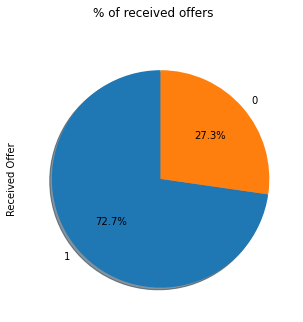

In [12]:
df1=df['Received Offer'].value_counts().plot(kind='pie',subplots=True, shadow = True,startangle=90,figsize=(8,5), autopct='%1.1f%%',title='% of received offers')
print(df['Received Offer'].value_counts()[1],"startups received an offer from the sharks.")
print(df['Received Offer'].value_counts()[0],"startups did not receive an offer from the sharks.")


67 startups accepted the investment offer from the sharks. 
21 startups rejected the offer from the sharks.



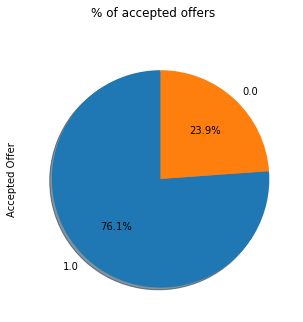

In [13]:
df1=df['Accepted Offer'].value_counts().plot(kind='pie',subplots=True, shadow = True,startangle=90,figsize=(8,5), autopct='%1.1f%%',title='% of accepted offers')
print(df['Accepted Offer'].value_counts()[1],"startups accepted the investment offer from the sharks. ")
print(df['Accepted Offer'].value_counts()[0],"startups rejected the offer from the sharks.\n")

#### No of startups started in each year

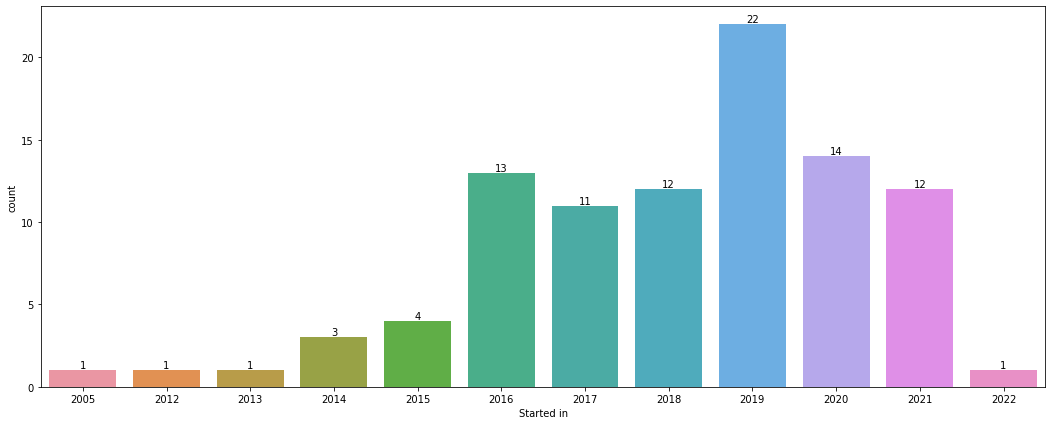

In [14]:
plt.figure(figsize=(18, 7))
df1=df.loc[df['Started in'].notnull()]
ax=sns.countplot(data =df1 , x = 'Started in')
ax.bar_label(ax.containers[0])
plt.show()
#https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot


#### Offers rejected by pitchers/startup companies

In [15]:
df.loc[df['Accepted Offer']==0, ["Startup Name","Industry","Original Ask Amount","Original Ask Equity"]].reset_index(drop=True)

,Startup Name,Industry,Original Ask Amount,Original Ask Equity
0,qZense Labs,Food,100.0,0.25
1,Torch-it,Education,75.0,1.00
2,La Kheer Deli,Food,50.0,7.50
3,Kabira Handmad,Food,100.0,5.00
4,Morriko Pure Foods,Food,100.0,3.00
5,India Hemp and Co,Food,50.0,4.00
6,Keto India,Food,150.0,1.25
7,Moonshine,Food,80.0,0.50
8,Falhari,Food,50.0,2.00
9,Urban Monkey,Beauty/Fashion,100.0,1.00


#### Total Amount asked by startups

In [16]:
print((df['Original Ask Amount'].sum()/100).round(2), "crores was the investment amount asked by all the startups.")

378.23 crores was the investment amount asked by all the startups.


#### Total amount invested by the sharks


In [17]:
print((df['Total Deal Amount'].sum()/100 + df['Total Deal Debt'].sum()/100).round(2), "crores was given by sharks in return of equity and as loans.")

42.54 crores was given by sharks in return of equity and as loans.


#### Total Deal amount vs states

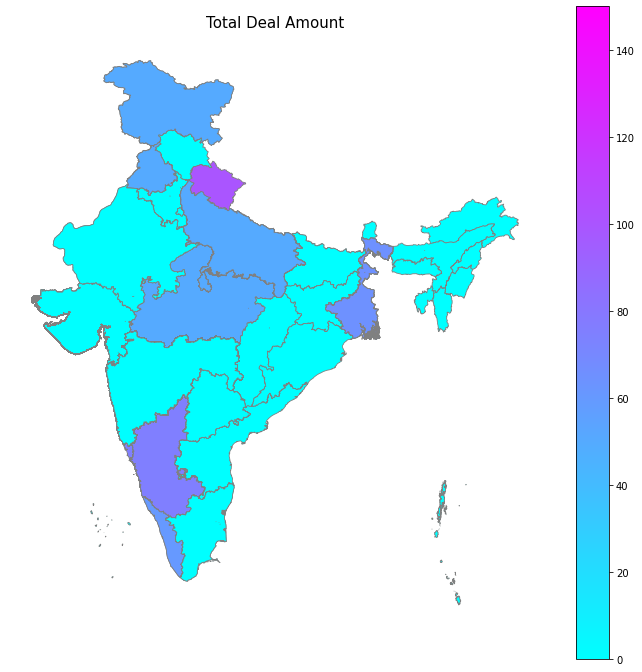

In [18]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(df.set_index('Pitchers State'))
merged['Total Deal Amount'] = merged['Total Deal Amount'].fillna(0)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Total Deal Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Deal Amount', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

#### Top 15 Startups with highest investment 

In [19]:
df1=df.nlargest(15, 'Total Deal Amount')
df1=df1[['Startup Name','Total Deal Amount']].reset_index(drop=True)
print(df1)
fig = px.bar(df1, x="Startup Name", y='Total Deal Amount', color="Startup Name",template='ggplot2', title="Top 15 investments (in lakhs)", text=df1['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()
#https://plotly.com/python/templates/

           Startup Name  Total Deal Amount
0         Aas Vidyalaya              150.0
1                 Annie              105.0
2           Revamp Moto              100.0
3       Skippi Ice Pops              100.0
4    Raising Superstars              100.0
5       The Yarn Bazaar              100.0
6     The Renal Project              100.0
7      Hammer Lifestyle              100.0
8              IN A CAN              100.0
9            Get-A-Whey              100.0
10  Sunfox Technologies              100.0
11   Insurance Samadhan              100.0
12             Humpy A2              100.0
13               Proxgy              100.0
14           RoadBounce               80.0


#### Top 10 Startups with lowest investment 

In [20]:
df2=df.nsmallest(10,'Total Deal Amount')
df2['Total Deal Amount in Rupees'] = df2['Total Deal Amount']*100000
df2=df2[['Startup Name','Total Deal Amount in Rupees']].reset_index(drop=True)
print(df2)
fig = px.bar(df2, x="Startup Name", y='Total Deal Amount in Rupees', color="Startup Name",template='plotly_dark', title="Top 10 lowest investments (in rupees)", text=df2['Total Deal Amount in Rupees'])
fig.show()

          Startup Name  Total Deal Amount in Rupees
0              Cocofit                          5.0
1   Watt Technovations                        101.0
2                 Otua                     100000.0
3          KG Agrotech                    1000000.0
4                 NOCD                    2000000.0
5             SneaKare                    2100000.0
6  Heart up my Sleeves                    2500000.0
7              Nuutjob                    2500000.0
8                  PNT                    2500000.0
9        Sid07 Designs                    2500000.0


#### Top 15 Startups with highest equity given 

In [21]:
df1=df.nlargest(15, 'Total Deal Equity')
df1=df1[['Startup Name','Total Deal Equity']].reset_index(drop=True)
print(df1)
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name",template='ggplot2', title="Top 15 investments (equity %)", text=df1['Total Deal Equity'].map(int).map(str)+"%")
fig.show()

             Startup Name  Total Deal Equity
0           Sid07 Designs              75.00
1           Booz Scooters              50.00
2         Isak Fragrances              50.00
3        Hammer Lifestyle              40.00
4             KG Agrotech              40.00
5            The Sass Bar              35.00
6     Vivalyf Innovations              33.33
7     Heart up my Sleeves              30.00
8     Gold Safe Solutions              30.00
9           Jain Shikanji              30.00
10                 Cos IQ              25.00
11                    PNT              25.00
12  Find Your Kicks India              25.00
13    Colour Me Mad - CMM              25.00
14                   LOKA              24.00


#### Amount invested by each shark

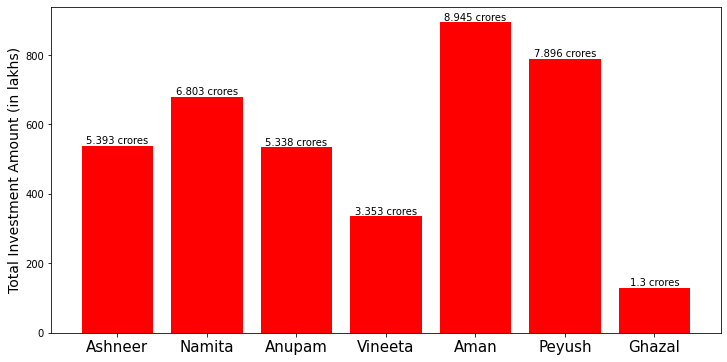

In [22]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], str((y[i]/100).round(3))+" crores", ha = 'center', va='bottom')
Amount = [df['Ashneer Investment Amount'].sum().round(2), df['Namita Investment Amount'].sum().round(2), df['Anupam Investment Amount'].sum().round(2),
          df['Vineeta Investment Amount'].sum().round(2),df['Aman Investment Amount'].sum().round(2), df['Peyush Investment Amount'].sum().round(2), 
          df['Ghazal Investment Amount'].sum().round(2)]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df1= {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(12,6))
plt.bar(df1['Name'], df1['Total Amount'],color='red')
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=14)
addlabels(name,Amount)
plt.show()
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

### Aman invested the highest amount - 8.945 cr
### Ghazal invested the least amount - 1.3 cr
------------------------------------------------------------------------------------

### Equity for each shark

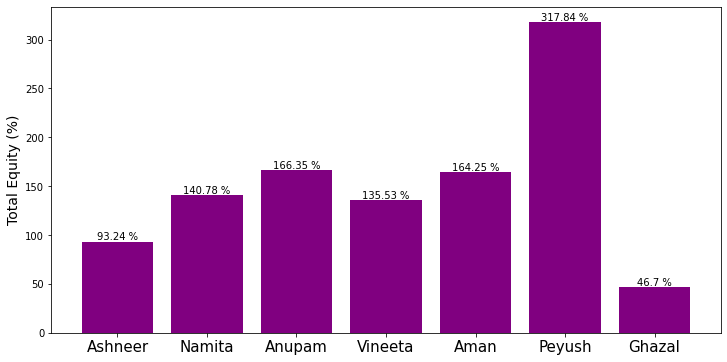

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], str(y[i])+" %", ha = 'center',va='bottom')
Equity = [df['Ashneer Investment Equity'].sum().round(2), df['Namita Investment Equity'].sum().round(2), df['Anupam Investment Equity'].sum().round(2),
          df['Vineeta Investment Equity'].sum().round(2),df['Aman Investment Equity'].sum().round(2), df['Peyush Investment Equity'].sum().round(2), 
          df['Ghazal Investment Equity'].sum().round(2)]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df1= {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(12,6))
plt.bar(df1['Name'], df1['Total Equity'],color='purple')
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (%)",fontsize=14)
addlabels(name,Equity)
plt.show()
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

### Peyush got the highest equity and Ghazal got the least.
----------------------------------------------------------------------------------------------

### Word Cloud for all the startups and their description

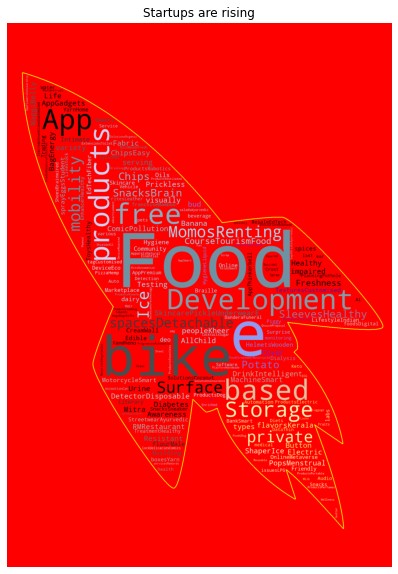

In [24]:
text = "".join(i for i in df['Business Description']).join(i for i in df['Startup Name'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/Untitled design.png'))
img_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width=1000, height=1500, stopwords=stopwords, mask=mask,background_color='red', contour_color='yellow',
                      contour_width=3, collocations=False, random_state=786).generate(text)
wordcloud.recolor(color_func = img_colors)
plt.figure(figsize=(15,10))
plt.title("Startups are rising")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Time to dig deep into investment by each shark.

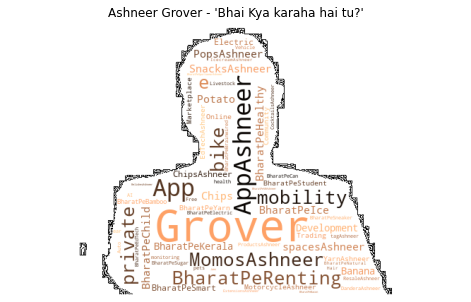

In [25]:
ashneer = df.loc[df['Ashneer Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Ashneer Grover BharatPe".join(i for i in ashneer['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/ashneer.jpeg'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False, colormap='copper',random_state=45).generate(text)
plt.figure(figsize=(10,5))
plt.title("Ashneer Grover - 'Bhai Kya karaha hai tu?'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ashneer Grover invested in 21 startups in Season 1.
Ashneer Grover invested Rs. 539.33 lakhs in Season 1 i.e. 5.39 crores
Ashneer Grover got a total equity of 93.24 %
So, on an avg. he got 4.44 % equity.
Ashneer Grover gave a total loan of Rs. 114.0 lakhs in Season 1 i.e. 1.14 crores
--------------------------------------------------------------------------------
              Startup Name             Industry  Ashneer Investment Amount
0           BluePine Foods                 Food                      25.00
1            Booz Scooters  Electrical Vehicles                      20.00
3               Tagz Foods                 Food                      70.00
15         Skippi Ice Pops                 Food                      20.00
18      Raising Superstars            Education                      50.00
21            Beyond Snack                 Food                      25.00
23           Motion Breeze  Electrical Vehicles                      30.00
29               EventBeep        

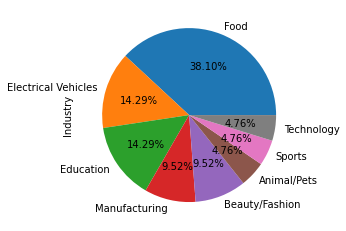

In [26]:
print("Ashneer Grover invested in",df[df['Ashneer Investment Amount']>0]['Ashneer Investment Amount'].count(),"startups in Season 1.")
print("Ashneer Grover invested Rs.",df[df['Ashneer Investment Amount']>0]['Ashneer Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Ashneer Investment Amount']>0]['Ashneer Investment Amount'].sum()/100).round(2), "crores")
print("Ashneer Grover got a total equity of",df[df['Ashneer Investment Amount']>0]['Ashneer Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Ashneer Investment Amount']>0]['Ashneer Investment Equity'].sum())/(df[df['Ashneer Investment Amount']>0]['Ashneer Investment Amount'].count())).round(2),"% equity.")
print("Ashneer Grover gave a total loan of Rs.",df[df['Ashneer Debt Amount']>0]['Ashneer Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Ashneer Investment Amount']>0]['Ashneer Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Ashneer Investment Amount']>0][['Startup Name','Industry','Ashneer Investment Amount']])
print('-'*80)
print("Ashneer Industry Wise Investment")
print(df[df['Ashneer Investment Amount']>0]['Industry'].value_counts())
df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(df1, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=df1['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

##### https://www.joydeepdeb.com/tools/find-replace.html - Find and replace Shark Names

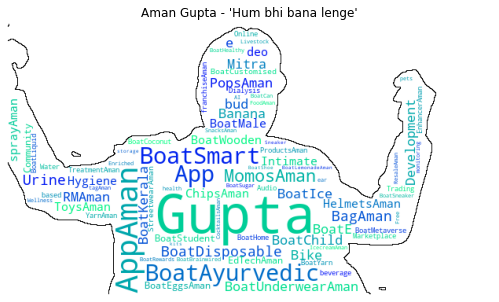

In [27]:
aman = df.loc[df['Aman Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Aman Gupta Boat".join(i for i in aman['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/aman.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='winter' ,random_state=45).generate(text)
plt.figure(figsize=(10,5))
plt.title("Aman Gupta - 'Hum bhi bana lenge'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Aman Gupta invested in 29 startups in Season 1.
Aman Gupta invested Rs. 894.49 lakhs in Season 1 i.e. 8.94 crores
Aman Gupta got a total equity of 164.25 %
So, on an avg. he got 5.66 % equity.
Aman Grover gave a total loan of Rs. 50.0 lakhs in Season 1 i.e. 0.5 crores
--------------------------------------------------------------------------------
              Startup Name             Industry  Aman Investment Amount
0           BluePine Foods                 Food               25.000000
7                Peeschute       Beauty/Fashion               75.000000
11                  Bummer       Beauty/Fashion               37.500000
12             Revamp Moto  Electrical Vehicles               50.000000
15         Skippi Ice Pops                 Food               20.000000
18      Raising Superstars            Education               50.000000
21            Beyond Snack                 Food               25.000000
24                   Altor        Manufacturing               25.000000
25

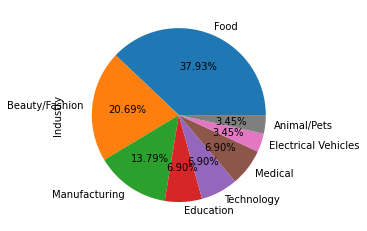

In [28]:
print("Aman Gupta invested in",df[df['Aman Investment Amount']>0]['Aman Investment Amount'].count(),"startups in Season 1.")
print("Aman Gupta invested Rs.",df[df['Aman Investment Amount']>0]['Aman Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Aman Investment Amount']>0]['Aman Investment Amount'].sum()/100).round(2), "crores")
print("Aman Gupta got a total equity of",df[df['Aman Investment Amount']>0]['Aman Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Aman Investment Amount']>0]['Aman Investment Equity'].sum())/(df[df['Aman Investment Amount']>0]['Aman Investment Amount'].count())).round(2),"% equity.")
print("Aman Grover gave a total loan of Rs.",df[df['Aman Debt Amount']>0]['Aman Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Aman Investment Amount']>0]['Aman Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Aman Investment Amount']>0][['Startup Name','Industry','Aman Investment Amount']])
print('-'*80)
print("Aman Industry Wise Investment")
print(df[df['Aman Investment Amount']>0]['Industry'].value_counts())
df[df['Aman Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(df1, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=df1['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

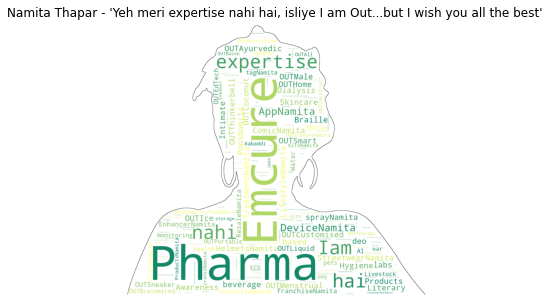

In [29]:
Namita = df.loc[df['Namita Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Namita Pharma Emcure expertise nahi hai Iam OUT".join(i for i in Namita['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/namita.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='summer' ,random_state=14).generate(text)
plt.figure(figsize=(10,5))
plt.title("Namita Thapar - 'Yeh meri expertise nahi hai, isliye I am Out...but I wish you all the best'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Namita Thapar invested in 24 startups in Season 1.
Namita Thapar invested Rs. 680.33 lakhs in Season 1 i.e. 6.8 crores
Namita Thapar got a total equity of 140.78 %
So, on an avg. he got 5.87 % equity.
Namita Thapar gave a total loan of Rs. 25.0 lakhs in Season 1 i.e. 0.25 crores
--------------------------------------------------------------------------------
              Startup Name        Industry  Namita Investment Amount
11                  Bummer  Beauty/Fashion                 37.500000
15         Skippi Ice Pops            Food                 20.000000
16            Menstrupedia       Education                 50.000000
24                   Altor   Manufacturing                 25.000000
27                 Nuutjob  Beauty/Fashion                  8.330000
32                   Farda  Beauty/Fashion                 15.000000
33                    Auli  Beauty/Fashion                 75.000000
36                   Annie       Education                 35.000000
39       The Renal

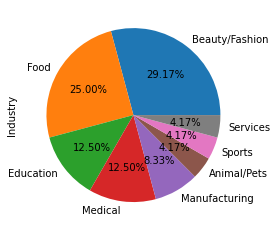

In [30]:
print("Namita Thapar invested in",df[df['Namita Investment Amount']>0]['Namita Investment Amount'].count(),"startups in Season 1.")
print("Namita Thapar invested Rs.",df[df['Namita Investment Amount']>0]['Namita Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Namita Investment Amount']>0]['Namita Investment Amount'].sum()/100).round(2), "crores")
print("Namita Thapar got a total equity of",df[df['Namita Investment Amount']>0]['Namita Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Namita Investment Amount']>0]['Namita Investment Equity'].sum())/(df[df['Namita Investment Amount']>0]['Namita Investment Amount'].count())).round(2),"% equity.")
print("Namita Thapar gave a total loan of Rs.",df[df['Namita Debt Amount']>0]['Namita Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Namita Investment Amount']>0]['Namita Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Namita Investment Amount']>0][['Startup Name','Industry','Namita Investment Amount']])
print('-'*80)
print("Namita Industry Wise Investment")
print(df[df['Namita Investment Amount']>0]['Industry'].value_counts())
df[df['Namita Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(df1, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=df1['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

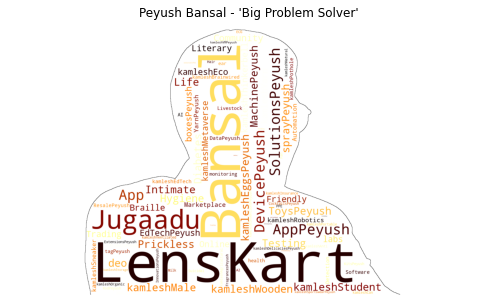

In [31]:
Peyush = df.loc[df['Peyush Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Peyush LensKart Bansal Jugaadu kamlesh".join(i for i in Peyush['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/peyush.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='afmhot' ,random_state=14).generate(text)
plt.figure(figsize=(10,5))
plt.title("Peyush Bansal - 'Big Problem Solver'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Peyush Bansal invested in 28 startups in Season 1.
Peyush Bansal invested Rs. 789.65 lakhs in Season 1 i.e. 7.9 crores
Peyush Bansal got a total equity of 317.84 %
So, on an avg. he got 11.35 % equity.
Peyush Bansal gave a total loan of Rs. 117.0 lakhs in Season 1 i.e. 1.17 crores
--------------------------------------------------------------------------------
              Startup Name        Industry  Peyush Investment Amount
22     Vivalyf Innovations         Medical                 28.000000
25                   Ariro   Manufacturing                 25.000000
27                 Nuutjob  Beauty/Fashion                  8.330000
28                Meatyour            Food                 10.000000
29               EventBeep       Education                 10.000000
35                    LOKA      Technology                 13.330000
36                   Annie       Education                 35.000000
37              Carragreen   Manufacturing                 25.000000
38         The Y

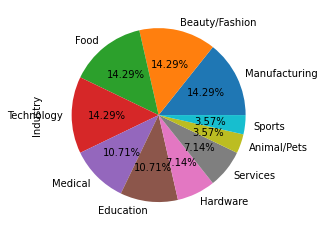

In [32]:
print("Peyush Bansal invested in",df[df['Peyush Investment Amount']>0]['Peyush Investment Amount'].count(),"startups in Season 1.")
print("Peyush Bansal invested Rs.",df[df['Peyush Investment Amount']>0]['Peyush Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Peyush Investment Amount']>0]['Peyush Investment Amount'].sum()/100).round(2), "crores")
print("Peyush Bansal got a total equity of",df[df['Peyush Investment Amount']>0]['Peyush Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Peyush Investment Amount']>0]['Peyush Investment Equity'].sum())/(df[df['Peyush Investment Amount']>0]['Peyush Investment Amount'].count())).round(2),"% equity.")
print("Peyush Bansal gave a total loan of Rs.",df[df['Peyush Debt Amount']>0]['Peyush Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Peyush Investment Amount']>0]['Peyush Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Peyush Investment Amount']>0][['Startup Name','Industry','Peyush Investment Amount']])
print('-'*80)
print("Peyush Industry Wise Investment")
print(df[df['Peyush Investment Amount']>0]['Industry'].value_counts())
df[df['Peyush Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(df1, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=df1['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

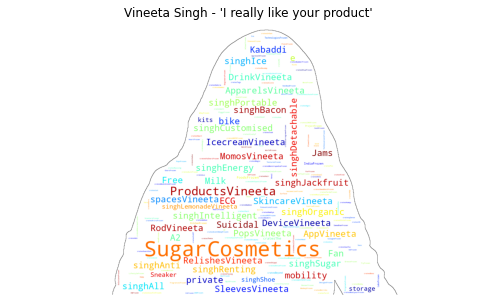

In [33]:
Vineeta = df.loc[df['Vineeta Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Vineeta SugarCosmetics singh".join(i for i in Vineeta['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/vineeta.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='jet' ,random_state=22).generate(text)
plt.figure(figsize=(10,5))
plt.title("Vineeta Singh - 'I really like your product'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Vineeta Singh invested in 16 startups in Season 1.
Vineeta Singh invested Rs. 335.32 lakhs in Season 1 i.e. 3.35 crores
Vineeta Singh got a total equity of 135.53 %
So, on an avg. he got 8.47 % equity.
Vineeta Singh gave a total loan of Rs. 30.0 lakhs in Season 1 i.e. 0.3 crores
--------------------------------------------------------------------------------
            Startup Name             Industry  Vineeta Investment Amount
0         BluePine Foods                 Food                      25.00
1          Booz Scooters  Electrical Vehicles                      20.00
2    Heart up my Sleeves       Beauty/Fashion                      12.50
8                   NOCD                 Food                      20.00
9                 Cos IQ       Beauty/Fashion                      25.00
15       Skippi Ice Pops                 Food                      20.00
64            Get-A-Whey                 Food                      33.33
66      The Quirky Naari       Beauty/Fashion          

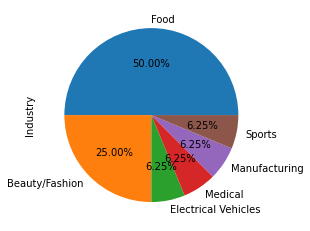

In [34]:
print("Vineeta Singh invested in",df[df['Vineeta Investment Amount']>0]['Vineeta Investment Amount'].count(),"startups in Season 1.")
print("Vineeta Singh invested Rs.",df[df['Vineeta Investment Amount']>0]['Vineeta Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Vineeta Investment Amount']>0]['Vineeta Investment Amount'].sum()/100).round(2), "crores")
print("Vineeta Singh got a total equity of",df[df['Vineeta Investment Amount']>0]['Vineeta Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Vineeta Investment Amount']>0]['Vineeta Investment Equity'].sum())/(df[df['Vineeta Investment Amount']>0]['Vineeta Investment Amount'].count())).round(2),"% equity.")
print("Vineeta Singh gave a total loan of Rs.",df[df['Vineeta Debt Amount']>0]['Vineeta Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Vineeta Investment Amount']>0]['Vineeta Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Vineeta Investment Amount']>0][['Startup Name','Industry','Vineeta Investment Amount']])
print('-'*80)
print("Vineeta Industry Wise Investment")
print(df[df['Vineeta Investment Amount']>0]['Industry'].value_counts())
df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(df1, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=df1['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

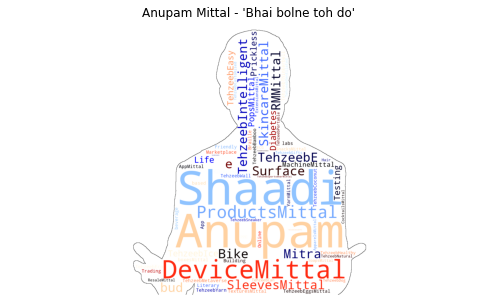

In [35]:
Anupam = df.loc[df['Anupam Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Mittal Anupam Shaadi.com Tehzeeb".join(i for i in Anupam['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/anupam.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='flag' ,random_state=4562).generate(text)
plt.figure(figsize=(10,5))
plt.title("Anupam Mittal - 'Bhai bolne toh do'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Anupam Mittal invested in 24 startups in Season 1.
Anupam Mittal invested Rs. 533.83 lakhs in Season 1 i.e. 5.34 crores
Anupam Mittal got a total equity of 166.35 %
So, on an avg. he got 6.93 % equity.
Anupam Mittal gave a total loan of Rs. 15.0 lakhs in Season 1 i.e. 0.15 crores
--------------------------------------------------------------------------------
                 Startup Name             Industry  Anupam Investment Amount
2         Heart up my Sleeves       Beauty/Fashion                 12.500000
9                      Cos IQ       Beauty/Fashion                 25.000000
12                Revamp Moto  Electrical Vehicles                 50.000000
15            Skippi Ice Pops                 Food                 20.000000
22        Vivalyf Innovations              Medical                 28.000000
28                   Meatyour                 Food                 10.000000
31   ARRCOAT Surface Textures        Manufacturing                 50.000000
35                    

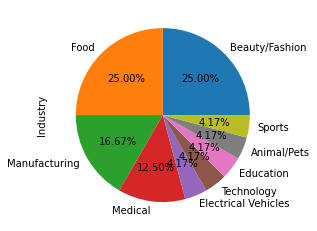

In [36]:
print("Anupam Mittal invested in",df[df['Anupam Investment Amount']>0]['Anupam Investment Amount'].count(),"startups in Season 1.")
print("Anupam Mittal invested Rs.",df[df['Anupam Investment Amount']>0]['Anupam Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Anupam Investment Amount']>0]['Anupam Investment Amount'].sum()/100).round(2), "crores")
print("Anupam Mittal got a total equity of",df[df['Anupam Investment Amount']>0]['Anupam Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Anupam Investment Amount']>0]['Anupam Investment Equity'].sum())/(df[df['Anupam Investment Amount']>0]['Anupam Investment Amount'].count())).round(2),"% equity.")
print("Anupam Mittal gave a total loan of Rs.",df[df['Anupam Debt Amount']>0]['Anupam Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Anupam Investment Amount']>0]['Anupam Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Anupam Investment Amount']>0][['Startup Name','Industry','Anupam Investment Amount']])
print('-'*80)
print("Anupam Industry Wise Investment")
print(df[df['Anupam Investment Amount']>0]['Industry'].value_counts())
df[df['Anupam Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(df1, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=df1['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

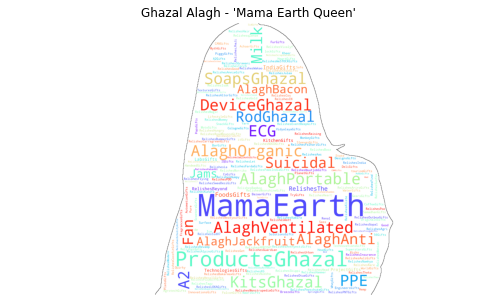

In [37]:
Ghazal = df.loc[df['Ghazal Investment Amount']>0,['Startup Name','Industry','Business Description']]
text = "Ghazal MamaEarth Alagh".join(i for i in Ghazal['Business Description']).join(i for i in df['Startup Name']).join(i for i in df['Industry'])
stopwords = STOPWORDS
mask = np.array(Image.open('../input/imagess/gahzal.png'))
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords, mask=mask,background_color='white', contour_color='black',
                      contour_width=0.5, collocations=False,colormap='rainbow' ,random_state=1).generate(text)
plt.figure(figsize=(10,5))
plt.title("Ghazal Alagh - 'Mama Earth Queen'")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ghazal Alagh invested in 7 startups in Season 1.
Ghazal Alagh invested Rs. 129.99 lakhs in Season 1 i.e. 1.3 crores
Ghazal Alagh got a total equity of 46.7 %
So, on an avg. he got 6.67 % equity.
Ghazal Alagh gave a total loan of Rs. 0.0 lakhs in Season 1 i.e. 0.0 crores
--------------------------------------------------------------------------------
            Startup Name        Industry  Ghazal Investment Amount
75          The Sass Bar  Beauty/Fashion                 25.000000
79   Sunfox Technologies         Medical                 20.000000
85    Watt Technovations         Medical                  0.000253
88              Humpy A2            Food                 33.330000
90   Gold Safe Solutions   Manufacturing                 16.660000
91           Wakao Foods            Food                 25.000000
110   Nomad Food Project            Food                 10.000000
--------------------------------------------------------------------------------
Ghazal Industry Wise Investment

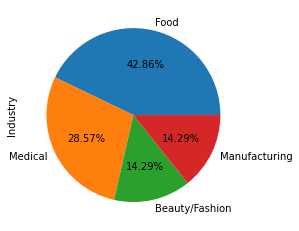

In [38]:
print("Ghazal Alagh invested in",df[df['Ghazal Investment Amount']>0]['Ghazal Investment Amount'].count(),"startups in Season 1.")
print("Ghazal Alagh invested Rs.",df[df['Ghazal Investment Amount']>0]['Ghazal Investment Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Ghazal Investment Amount']>0]['Ghazal Investment Amount'].sum()/100).round(2), "crores")
print("Ghazal Alagh got a total equity of",df[df['Ghazal Investment Amount']>0]['Ghazal Investment Equity'].sum().round(2),"%")
print("So, on an avg. he got",((df[df['Ghazal Investment Amount']>0]['Ghazal Investment Equity'].sum())/(df[df['Ghazal Investment Amount']>0]['Ghazal Investment Amount'].count())).round(2),"% equity.")
print("Ghazal Alagh gave a total loan of Rs.",df[df['Ghazal Debt Amount']>0]['Ghazal Debt Amount'].sum().round(2),"lakhs in Season 1 i.e.",(df[df['Ghazal Investment Amount']>0]['Ghazal Debt Amount'].sum()/100).round(2), "crores")
print('-'*80)
print(df[df['Ghazal Investment Amount']>0][['Startup Name','Industry','Ghazal Investment Amount']])
print('-'*80)
print("Ghazal Industry Wise Investment")
print(df[df['Ghazal Investment Amount']>0]['Industry'].value_counts())
df[df['Ghazal Investment Amount']>0]['Industry'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#barchart
df1 = df.loc[df['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(df1, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name",template='plotly', title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=df1['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()